# Introcucción al estudio de Redes Complejas

## Sergio A. Alcalá

In [18]:
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import *

import math as math
import seaborn as sns

# %matplotlib inline
%matplotlib notebook
from ipywidgets import *

anch = 7.5
alt = anch/float(1.6180334)

In [19]:
G = nx.Graph()

In [3]:
G.nodes()

NodeView(())

In [4]:
nodos = []
for i in range(10):
    nodos.append(i)

nodos

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
G.add_nodes_from(nodos)

In [6]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [7]:
G.edges()

EdgeView([])

In [8]:
G.add_edges_from([(3,7),(0,1),(2,8),(9,3),(2,3),(5,4),(0,0)])

In [9]:
G.edges()

EdgeView([(0, 1), (0, 0), (2, 8), (2, 3), (3, 7), (3, 9), (4, 5)])

<IPython.core.display.Javascript object>


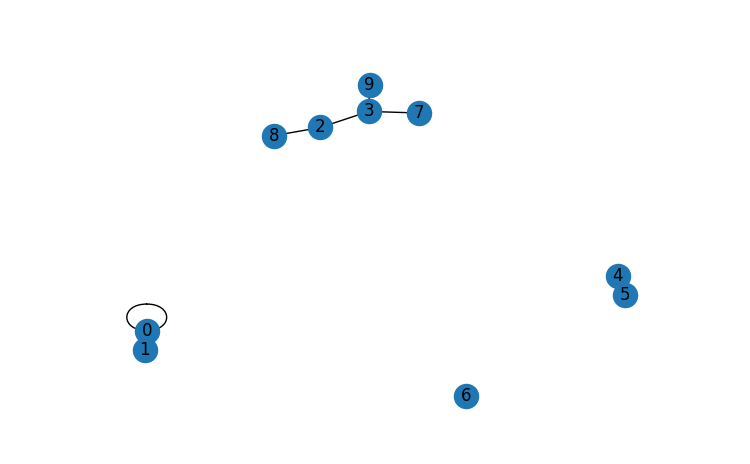

In [10]:
fig, ax = plt.subplots(figsize=(anch, alt))

nx.draw(G, with_labels=True)

In [12]:
nx.is_connected(G)

False

In [13]:
nx.is_weighted(G)

False

In [14]:
nx.has_path(G,7,8)

True

In [15]:
nx.number_connected_components(G)

4

In [16]:
list(nx.connected_components(G))

[{0, 1}, {2, 3, 7, 8, 9}, {4, 5}, {6}]

In [17]:
nx.shortest_path(G)

{0: {0: [0], 1: [0, 1]},
 1: {1: [1], 0: [1, 0]},
 2: {2: [2], 8: [2, 8], 3: [2, 3], 7: [2, 3, 7], 9: [2, 3, 9]},
 3: {3: [3], 7: [3, 7], 9: [3, 9], 2: [3, 2], 8: [3, 2, 8]},
 4: {4: [4], 5: [4, 5]},
 5: {5: [5], 4: [5, 4]},
 6: {6: [6]},
 7: {7: [7], 3: [7, 3], 9: [7, 3, 9], 2: [7, 3, 2], 8: [7, 3, 2, 8]},
 8: {8: [8], 2: [8, 2], 3: [8, 2, 3], 7: [8, 2, 3, 7], 9: [8, 2, 3, 9]},
 9: {9: [9], 3: [9, 3], 7: [9, 3, 7], 2: [9, 3, 2], 8: [9, 3, 2, 8]}}

## Modelo de Erdos Renyi

In [18]:
n = 300
p = 0.05

ER = nx.erdos_renyi_graph(n,p)

<IPython.core.display.Javascript object>


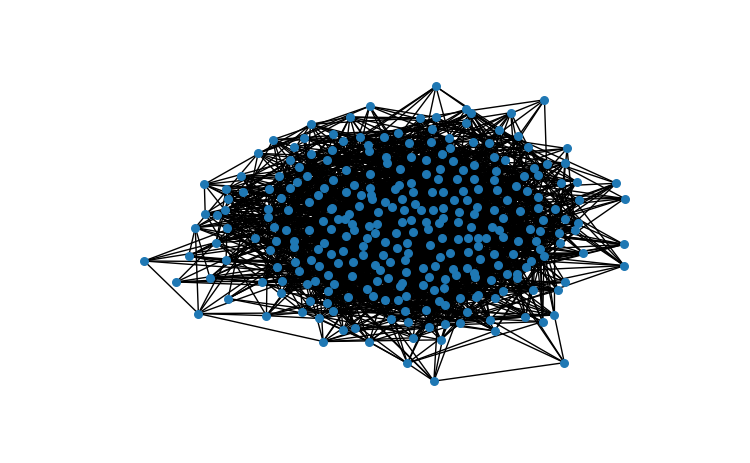

In [19]:
fig, ax = plt.subplots(figsize=(anch, alt))

nx.draw_spring(ER,node_size=30)
# nx.draw_spring(ER)

In [20]:
n = 5000
p = 0.05

ER = nx.erdos_renyi_graph(n,p)

In [21]:
nx.degree(ER)

DegreeView({0: 287, 1: 238, 2: 241, 3: 249, 4: 235, 5: 280, 6: 266, 7: 234, 8: 241, 9: 249, 10: 240, 11: 264, 12: 235, 13: 247, 14: 255, 15: 245, 16: 259, 17: 267, 18: 264, 19: 251, 20: 256, 21: 242, 22: 273, 23: 233, 24: 240, 25: 261, 26: 254, 27: 241, 28: 242, 29: 243, 30: 272, 31: 260, 32: 276, 33: 243, 34: 259, 35: 246, 36: 242, 37: 261, 38: 255, 39: 234, 40: 246, 41: 269, 42: 252, 43: 267, 44: 239, 45: 253, 46: 282, 47: 220, 48: 260, 49: 245, 50: 246, 51: 276, 52: 254, 53: 259, 54: 253, 55: 291, 56: 222, 57: 231, 58: 252, 59: 220, 60: 269, 61: 242, 62: 276, 63: 238, 64: 274, 65: 263, 66: 236, 67: 238, 68: 258, 69: 265, 70: 250, 71: 259, 72: 225, 73: 247, 74: 259, 75: 266, 76: 265, 77: 235, 78: 262, 79: 265, 80: 257, 81: 255, 82: 275, 83: 240, 84: 254, 85: 235, 86: 275, 87: 254, 88: 239, 89: 261, 90: 223, 91: 257, 92: 280, 93: 225, 94: 245, 95: 232, 96: 242, 97: 241, 98: 265, 99: 255, 100: 235, 101: 268, 102: 243, 103: 253, 104: 258, 105: 217, 106: 237, 107: 246, 108: 238, 109: 251

In [57]:
d = dict(nx.degree(ER))
seq = sorted(d.values())

<IPython.core.display.Javascript object>


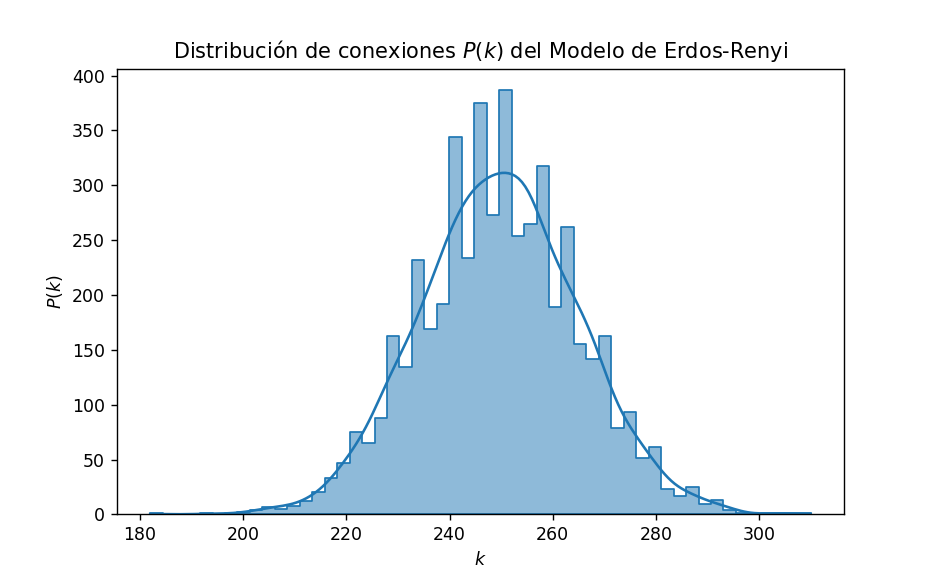

<AxesSubplot:title={'center':'Distribución de conexiones $P(k)$ del Modelo de Erdos-Renyi'}, xlabel='$k$', ylabel='$P(k)$'>

In [59]:
fig, ax = plt.subplots(figsize=(anch, alt))

plt.title("Distribución de conexiones $P(k)$ del Modelo de Erdos-Renyi")
plt.xlabel('$k$')
plt.ylabel('$P(k)$')

# plt.hist(seq)
sns.histplot(seq,stat='count',kde=True, fill= True, element='step') 

<IPython.core.display.Javascript object>


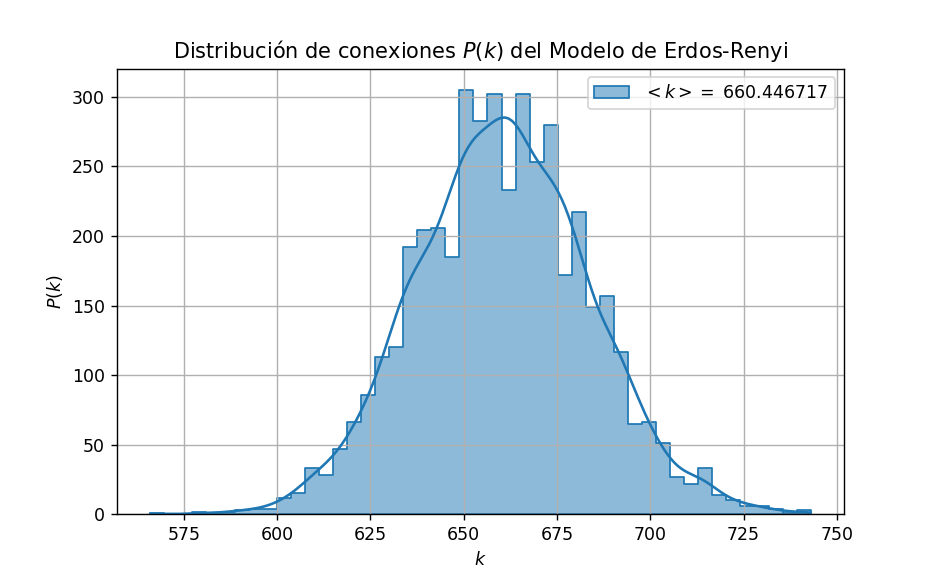

interactive(children=(IntSlider(value=2500, description='n', max=7000, min=1), FloatSlider(value=0.05, descrip…

In [60]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

@widgets.interact(n=(1, 7000, 1), p=(0, 1 ,0.05))

def update(n=2500, p = 0.05):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    print("z = p(n-1) =",p*(n-1))
    
    
    ER = nx.erdos_renyi_graph(n,p)
    
    d = dict(nx.degree(ER))
    seq = sorted(d.values())
    
    Kavg = sum(d.values()) / len(d)
#     if n<=3000: cc = nx.average_clustering(ER)

    plt.title("Distribución de conexiones $P(k)$ del Modelo de Erdos-Renyi")
    plt.xlabel('$k$')
    plt.ylabel('$P(k)$')

    # plt.hist(seq)
#     if n<=3000:
#         sns.histplot(seq,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f \n $< C > =$ %f' % (Kavg,cc))
#     else:
#         sns.histplot(seq,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f' % Kavg)
        
    sns.histplot(seq,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f' % Kavg)


    plt.legend()
    
    global ErdReny
    ErdReny = ER
    
    global pER
    pER = p
    
    global kER
    kER = Kavg
    
    global nER
    nER = n   
    

In [61]:
# nx.average_clustering(ErdReny)
Cavg = nx.average_clustering(ErdReny)
Cavg

0.15009361137268482

In [ ]:
spl = nx.average_shortest_path_length(ErdReny)
spl

In [62]:
math.log(nER) / math.log(kER)

1.2921138185106151

### Grado Promedio

$ \langle k \rangle = p(n-1)$

### Clustering Coeffient Promedio


$ \langle C \rangle  = \dfrac{\langle k \rangle }{n}$

$ \langle C \rangle  = \dfrac{p(n-1)}{n}$

$ \langle C \rangle  \sim p$

### Distancia promedio entre nodos (SPL)

$ \langle l \rangle  \sim \dfrac{log(n)}{log(\langle k \rangle) }$

In [24]:
ERdf = pd.DataFrame(dict(
    DEGREE = dict(ErdReny.degree),
    CLUSTCOEF = nx.clustering(ErdReny),
)) 
# ERdf

In [25]:
ERdfSrt = ERdf.sort_values(by=['DEGREE'])
# ERdfSrt = ERdf.sort_values(by=['DEGREE'], ascending=False)
# ERdfSrt

<IPython.core.display.Javascript object>


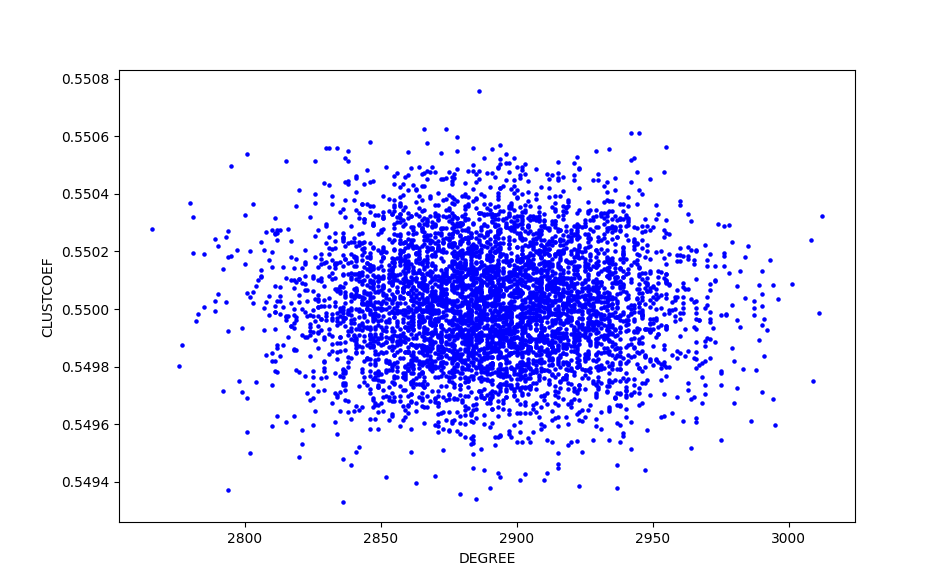

interactive(children=(IntSlider(value=50, description='Kmin', max=3012, min=10, step=10), FloatSlider(value=0.…

In [26]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

maxK = ERdfSrt['DEGREE'].max()  

@widgets.interact(Kmin=(10,maxK,10), Cmax=(0,1,0.01))

def update(Kmin=50, Cmax=0.5):    
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()    
    ax.grid(True)
    
    ERdfSrt2 = ERdfSrt[ERdfSrt['DEGREE'] > Kmin]
      
    ERdfSrt2.plot(x ='DEGREE', y='CLUSTCOEF', kind = 'scatter', color='blue', marker='.',ax=ax)    
    plt.axhline(y = Cavg, color = 'r', linestyle = 'dotted')
    
    plt.ylim([-Cmax, Cmax])

    plt.title("Clustering Coefficient $C$ vs grado $k$. \n Modelo de Erdos-Renyi")
    plt.xlabel('$k$')
    plt.ylabel('$c(k)$')    
#     plt.legend()


### Percolación y la Isla Gigante

<IPython.core.display.Javascript object>


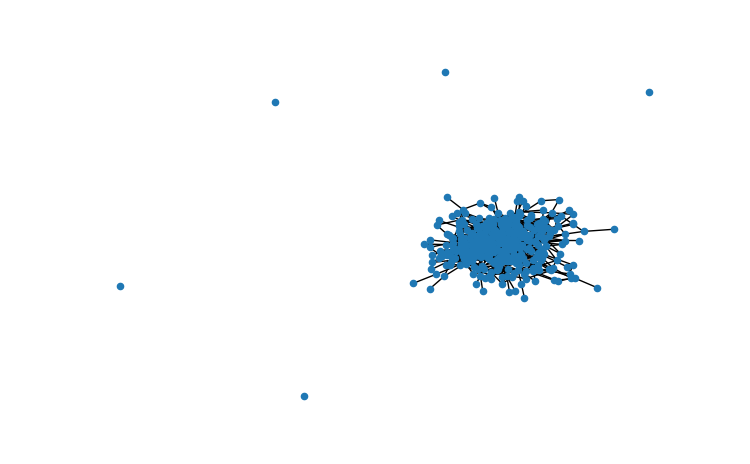

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), FloatSlider(value=1.0, descriptio…

In [63]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

@widgets.interact(n=(1, 500, 1), z=(0.25, 7 ,0.25))

def update(n=250, z = 1):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    p = z/float(n-1)

    ER0 = nx.erdos_renyi_graph(n,p)
    
    nx.draw_spring(ER0,node_size=20)
    

In [64]:
P = []
Z = []
   
n = 5000

for z in np.arange(0.0,5,.15):

    p = z/float(n-1)    

    ER = nx.erdos_renyi_graph(n,p)

    l = []    
    for i in nx.components.connected_components(ER):
        l.append(len(i)/n)
    l = sorted(l,reverse=True)
    P.append(l[0])
    Z.append(z)

<IPython.core.display.Javascript object>


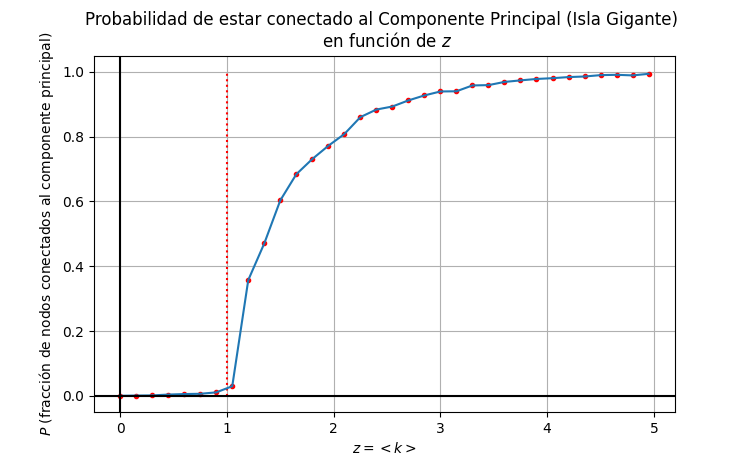

In [65]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

plt.title("Probabilidad de estar conectado al Componente Principal (Isla Gigante) \n en función de $z$")
plt.ylabel("$P$ (fracción de nodos conectados al componente principal)")
plt.xlabel("$z = < k >$")    
    
plt.plot(Z,P,'r.')
plt.plot(Z,P)

plt.vlines(x=1, ymin=0, ymax=1, colors='red', linestyle = 'dotted')

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')   

## Modelo de Watts-Strogatz

In [67]:
nx.watts_strogatz_graph

In [68]:
Rws = nx.watts_strogatz_graph(100,5,0.8)

<IPython.core.display.Javascript object>


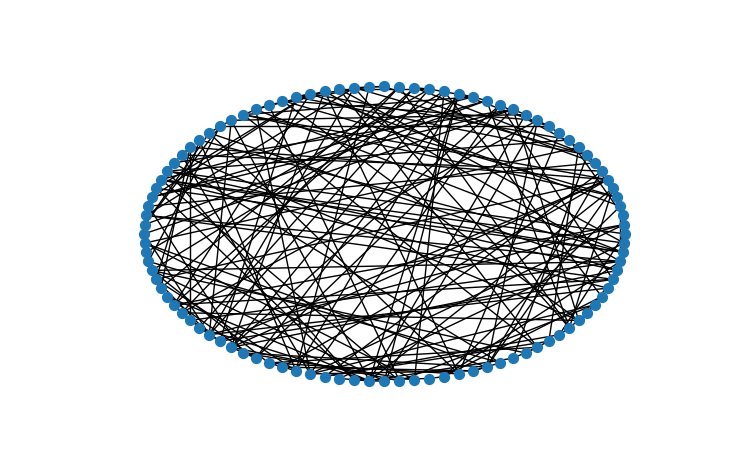

In [69]:
fig, ax = plt.subplots(figsize=(anch, alt))

nx.draw_circular(Rws,node_size=50)

<IPython.core.display.Javascript object>


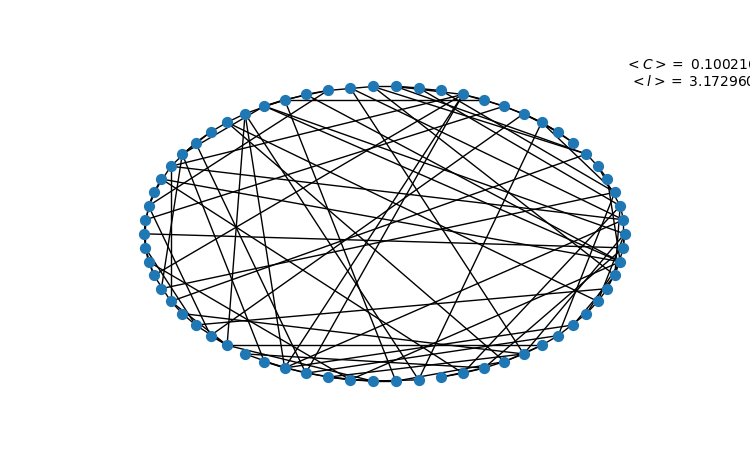

interactive(children=(IntSlider(value=15, description='n', min=5), IntSlider(value=2, description='z', max=8, …

In [70]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

@widgets.interact(n=(5, 100, 1), z=(2, 8 ,2), p=(0.0,1,0.01))

def update(n=15, z=2, p=0):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    Rws = nx.watts_strogatz_graph(n,z,p)
    
    cc = nx.average_clustering(Rws)
    spl = nx.average_shortest_path_length(Rws)
    
    nx.draw_circular(Rws,node_size=50)
    
    ax.text(1,1,'$< C > =$ %f \n $ < l > =$ %f' % (cc,spl)) 

<IPython.core.display.Javascript object>


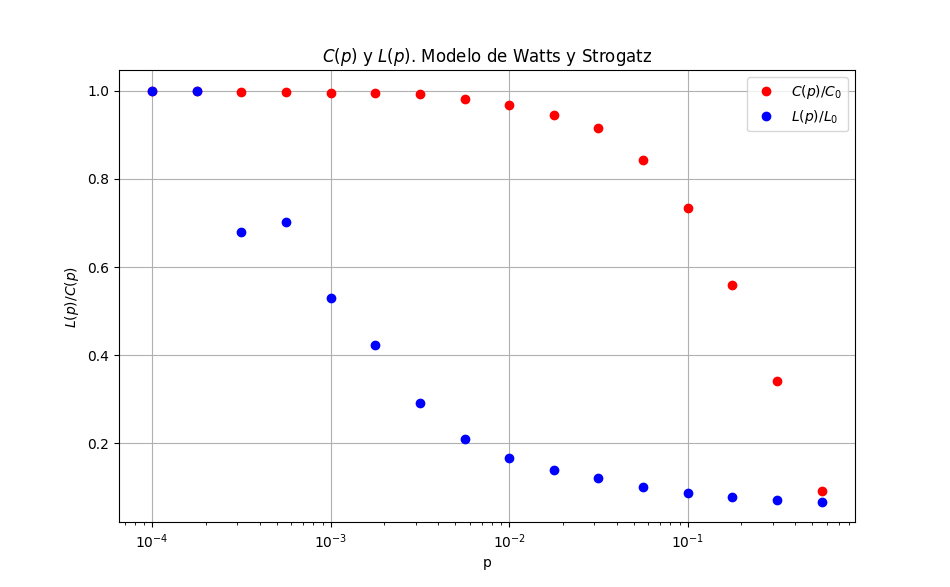

In [71]:
########## Diagrama del paper de Watts y Strogatz ###############

N = 1000
k = 10

# Listas para guaradar valores
P = []
C = []
L = []

### Modelo incial 
WS0 = nx.watts_strogatz_graph(N,k,0)
c0 = nx.average_clustering(WS0)
l0 =nx.average_shortest_path_length(WS0)

## Variacion logaritmica de p
for i in np.arange(-4,0,0.25):
    p = 10**i

    WS = nx.watts_strogatz_graph(N,k,p)
    c = nx.average_clustering(WS)
    l = nx.average_shortest_path_length(WS)
    
    P.append(p)
    C.append(c/c0)
    L.append(l/l0)


#### Figura ############
anch = 9.5
alt = anch/float(1.6180334)
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

plt.title("$C(p)$ y $L(p)$. Modelo de Watts y Strogatz")
plt.xlabel('p')
plt.ylabel('$L(p)$/$C(p)$')

plt.xscale("log")
plt.plot(P,C,'ro',label=r'$C(p)/C_0$')
plt.plot(P,L,'bo',label=r'$L(p)/L_0$')

plt.legend()   

## Modelo de Barabasi-Alberts

In [ ]:
nx.barabasi_albert_graph?

In [11]:
BA = nx.barabasi_albert_graph(500,1)

<IPython.core.display.Javascript object>


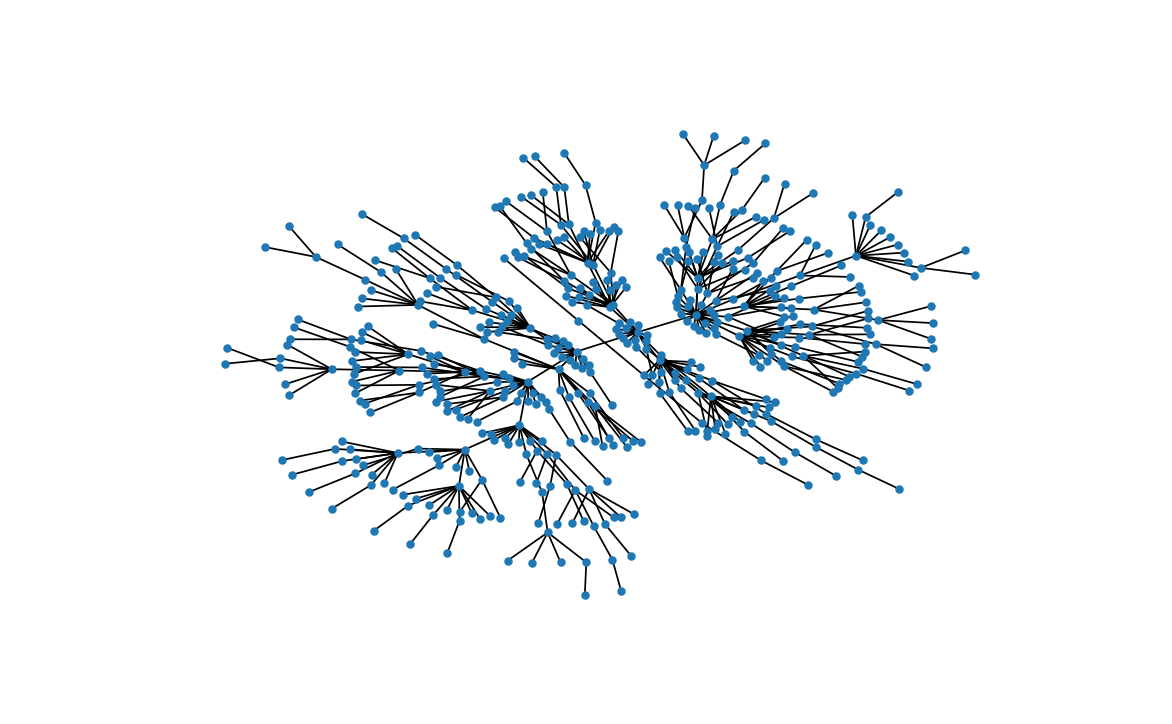

In [22]:
fig, ax = plt.subplots(figsize=(anch, alt))

# nx.draw_spring(BA)
# nx.draw_spring(BA,node_size=15)
# nx.draw_networkx(BA,node_size=50)

nx.draw_kamada_kawai(BA,node_size=15)  # ideal para arboles, pero lento


In [28]:
dBA = dict(nx.degree(BA))
seqBA = sorted(dBA.values())

<IPython.core.display.Javascript object>


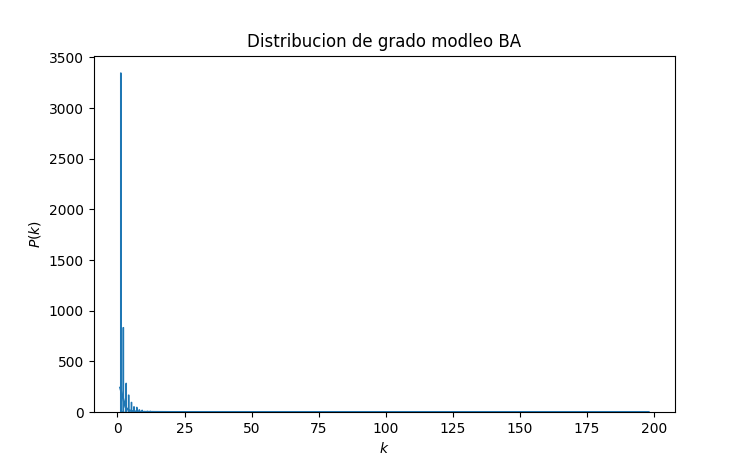

[Text(0.5, 0, '$k$'),
 Text(0, 0.5, '$P(k)$'),
 Text(0.5, 1.0, 'Distribucion de grado modleo BA')]

In [29]:
fig, ax = plt.subplots(figsize=(anch, alt))

# plt.hist(seqBA)
p = sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step')
p.set( xlabel = "$k$", ylabel = "$P(k)$",title='Distribucion de grado modleo BA') 

<IPython.core.display.Javascript object>


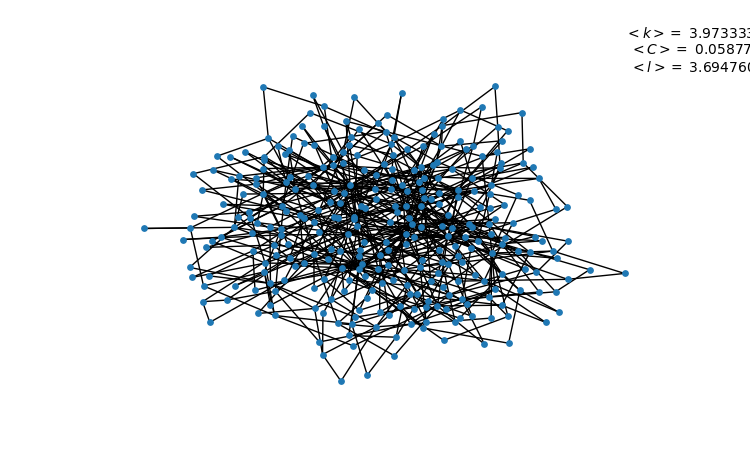

interactive(children=(IntSlider(value=100, description='n', max=1000, min=100, step=100), IntSlider(value=1, d…

In [48]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

@widgets.interact(n=(100, 1000, 100), k=(1, 5, 1))

def update(n=100, k=1):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    BAnet = nx.barabasi_albert_graph(n,k)
    
    KBA = dict(nx.degree(BAnet))    
    
    Kavg = sum(KBA.values()) / len(KBA)    
    cc = nx.average_clustering(BAnet)
    spl = nx.average_shortest_path_length(BAnet)
    
    
#     print(cc)
    
#     nx.draw(BAnet,node_size=15)
    nx.draw_spring(BAnet,node_size=15)
    
#     ax.text(1,1,'$< C > =$ %f \n $ < l > =$ %f' % (cc,spl)) 
    ax.text(1,1,'$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))
    
#     global BAm
#     BAm = BAnet

<IPython.core.display.Javascript object>


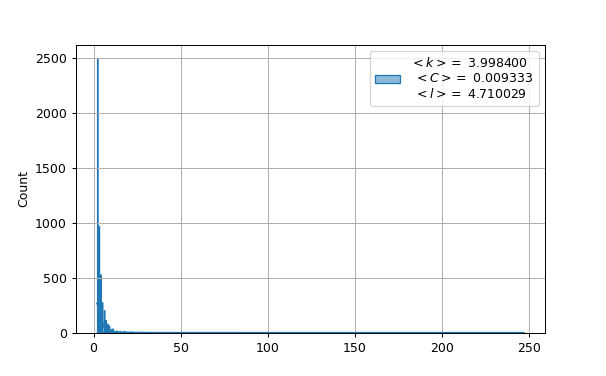

In [50]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)
    
BAnet = nx.barabasi_albert_graph(5000,2)
    
dBA = dict(nx.degree(BAnet))
seqBA = sorted(dBA.values())    
    
Kavg = sum(dBA.values()) / len(dBA)  
cc = nx.average_clustering(BAnet)
spl = nx.average_shortest_path_length(BAnet)



#     plt.hist(seqBA)
sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))
# sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< C > =$ %f \n $ < l > =$ %f' % (cc,spl))

plt.legend()
    

<IPython.core.display.Javascript object>


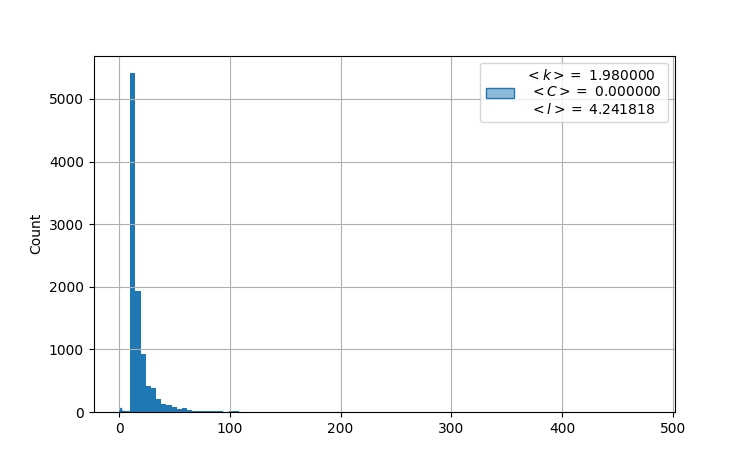

interactive(children=(IntSlider(value=100, description='n', max=10000, min=100, step=500), IntSlider(value=1, …

In [30]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)


@widgets.interact(n=(100, 10000, 500), k=(1, 20, 1))

def update(n=100, k=1):
    
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()    
    ax.grid(True)
    
    BAnet = nx.barabasi_albert_graph(n,k)
    
    dBA = dict(nx.degree(BAnet))
    seqBA = sorted(dBA.values())    
    
    print("N =",n)
    
    Kavg = sum(dBA.values()) / len(dBA)  
    cc = nx.average_clustering(BAnet)
    if n<=3000: spl = nx.average_shortest_path_length(BAnet)
    

#     plt.hist(seqBA)
    if n<=3000: 
        sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))
    else:
        sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f \n $< C > =$ %f' % (Kavg,cc))

#     plt.legend()
    
#     sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f' % Kavg)
#     sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f \n $< C > =$ %f' % (Kavg,cc))
#     sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))
    plt.legend()


In [29]:
#############

BA = nx.barabasi_albert_graph(10000,10)
    
dBA = dict(nx.degree(BA))
seqBA = sorted(dBA.values())    
    
Kavg = sum(seqBA) / len(dBA)  
cc = nx.average_clustering(BA)
spl = nx.average_shortest_path_length(BA)

cajas = 100
histBA = plt.hist(seqBA, bins=cajas)

K = []
for i in range(len(histBA[1])-1):
    K.append(histBA[1][i])


<ipython-input-29-79713b463197>:8: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  Kavg = sum(seqBA) / len(dBA)


<ipython-input-30-5719d7eb48d6>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sum(dBA.values)


<function dict.values>

<IPython.core.display.Javascript object>


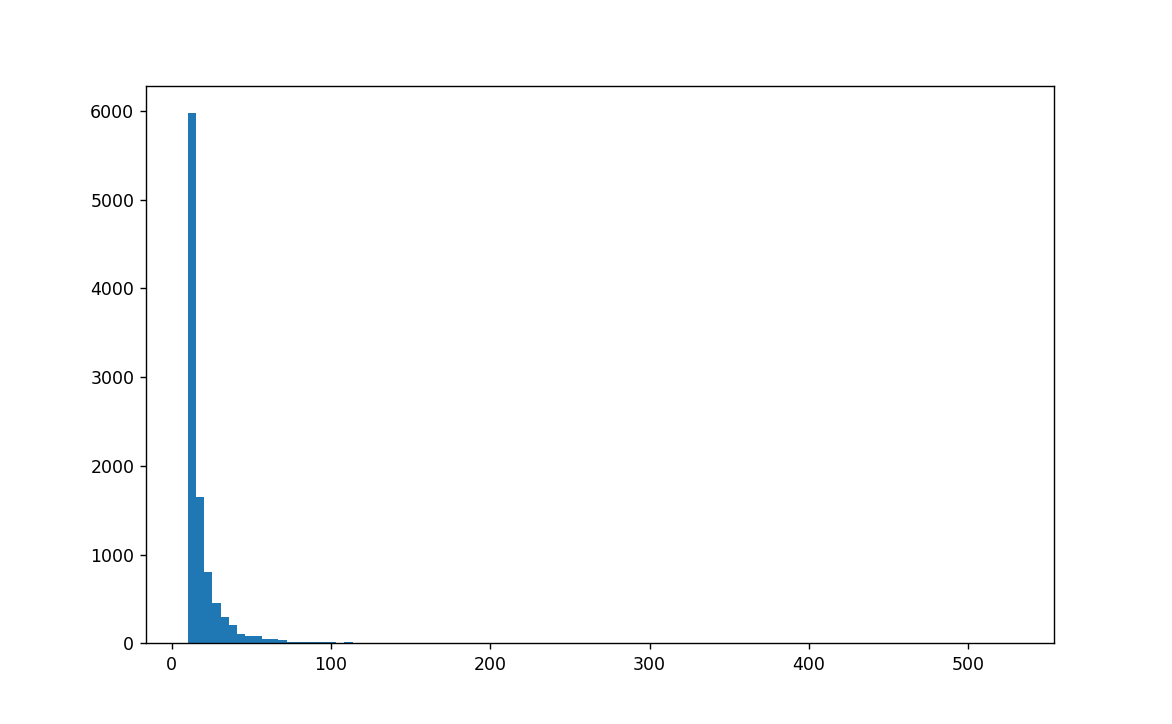

NameError: name 'Kavg' is not defined

In [24]:
fig, ax = plt.subplots(figsize=(anch, alt))

sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))
# sns.histplot(seqBA,stat='count',kde=True, fill= True, element='step', label='$< k > =$ %f \n $< C > =$ %f % (Kavg,cc))

plt.title("Distribución de grado. \n Modelo de Barabasi-Alberts")

plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.legend()

<IPython.core.display.Javascript object>


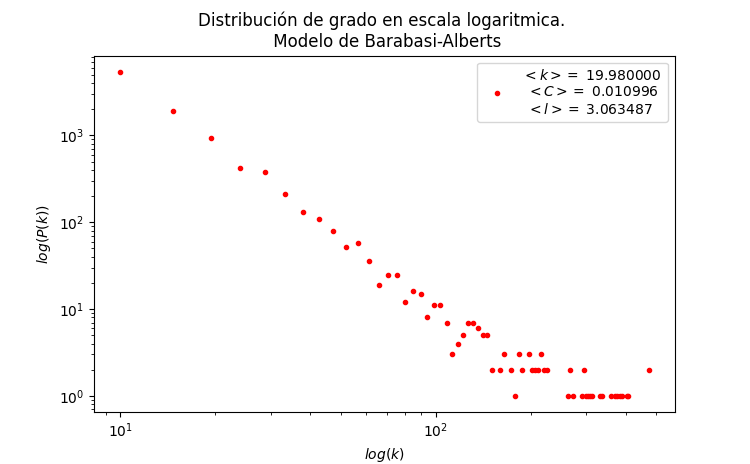

In [35]:
fig, ax = plt.subplots(figsize=(anch, alt))

plt.loglog(K,histBA[0], 'r.', label='$< k > =$ %f \n $< C > =$ %f \n $ < l > =$ %f' % (Kavg,cc,spl))

plt.title("Distribución de grado en escala logaritmica. \n Modelo de Barabasi-Alberts")
plt.xlabel('$log(k)$')
plt.ylabel('$log(P(k))$')

plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(anch, alt))

x = np.log(K)
y = np.log(histBA[0], out=np.zeros_like(histBA[0]), where=(histBA[0]!=0))

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'r.') 
plt.plot(x, poly1d_fn(x), '--k', label='m = %f, \n b = %f' % (coef[0],coef[1]))

plt.xlabel('$log(k)$')
plt.ylabel('$log(P(k))$')
plt.legend()

print(coef)

<IPython.core.display.Javascript object>


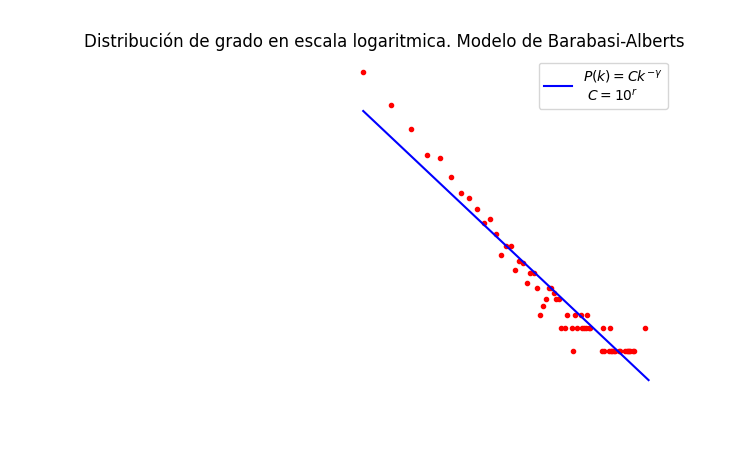

interactive(children=(FloatSlider(value=2.120090324953327, description='gamma', max=3.0, min=1.0, step=0.01), …

In [38]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)


@widgets.interact(gamma=(1,3,0.01), r=(1,15,1), xmin=(0,min(K), 0.1), xmax=(min(K),2*max(K),1) )

def update(gamma=-coef[0], r=1,xmin=min(K),xmax=round(max(K),-2)):
    
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()    
    ax.grid(True)
    
    if r == 1:
           C = math.exp(coef[1])
    else:
           C = 10**r

#     C = math.exp(coef[1])

#     X = np.linspace(min(K),round(max(K),-2),cajas)  # np.linspace(xmin,xmax,numPtos)    
    X = np.linspace(xmin,xmax,cajas)  # np.linspace(xmin,xmax,numPtos)               
    Y = C*(X**(-gamma))

    plt.loglog(K,histBA[0], 'r.')
    plt.plot(X, Y, '-b', label=r'$P(k) = Ck^{-\gamma}$'+"\n $C = 10^r$")

    plt.title("Distribución de grado en escala logaritmica. Modelo de Barabasi-Alberts")
    plt.xlabel('$log(k)$')
    plt.ylabel('$log(P(k))$')
    plt.legend()





In [ ]:
BAdfSrt2 = BAdf.sort_values(by=['DEGREE'])
# BAdfSrt = BAdf.sort_values(by=['DEGREE'], ascending=False)
BAdfSrt

In [ ]:
Cavg = nx.average_clustering(BA)

In [ ]:
BAdfSrt2['DEGREE'].max() 

In [ ]:
fig, ax = plt.subplots(figsize=(anch, alt))
ax.grid(True)

maxK = BAdfSrt2['DEGREE'].max()  

@widgets.interact(Kmin=(10,maxK,10), Cmax=(0,1,0.01))

def update(Kmin=50, Cmax=0.5):    
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()    
    ax.grid(True)
    
    BAdfSrt2 = BAdfSrt[BAdfSrt['DEGREE'] > Kmin]
      
    BAdfSrt2.plot(x ='DEGREE', y='CLUSTCOEF', kind = 'scatter', color='blue', marker='.',ax=ax)    
    plt.axhline(y = Cavg, color = 'r', linestyle = 'dotted')
    
    plt.ylim([-Cmax, Cmax])

    plt.title("Clustering Coefficient $C$ vs grado $k$. \n Modelo de Barabasi-Alberts")
    plt.xlabel('$k$')
    plt.ylabel('$c(k)$')    
#     plt.legend()


# Modularidad 

In [49]:
import networkx.algorithms.community as nx_comm

In [50]:
G = nx.barbell_graph(3, 0)
G2 = nx.barbell_graph(4, 0)

<IPython.core.display.Javascript object>


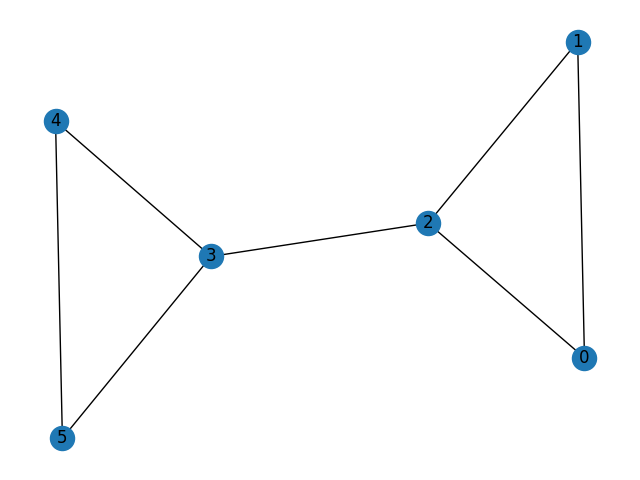

In [51]:
nx.draw(G, with_labels=True)

<IPython.core.display.Javascript object>


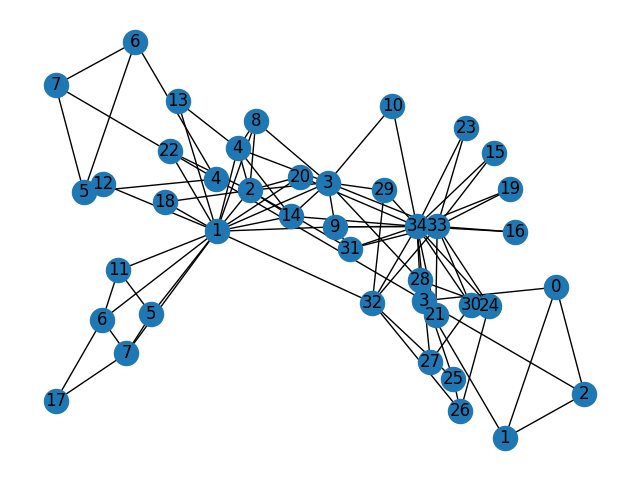

In [52]:
nx.draw(G2, with_labels=True)

In [56]:
nx_comm.modularity(G, [{0, 1, 2}, {3, 4, 5}])
# nx_comm.modularity(G, [{0, 1},{2,3}, {4, 5}])
# nx_comm.modularity(G, [{0,1}, {2,3,4, 5}])

0.35714285714285715

In [58]:
# nx_comm.modularity(G2, [{0, 1, 2,3}, {4, 5,6,7}])
nx_comm.modularity(G2, [{0, 2,4,6}, {1, 3,5,7}])

-0.1923076923076923

In [ ]:
# nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

In [59]:
nx_comm.label_propagation_communities(G2)

dict_values([{0, 1, 2, 3}, {4, 5, 6, 7}])

In [60]:
m = nx_comm.girvan_newman(G2)

In [61]:
for i in m:
    Q = nx_comm.modularity(G2,i)
    print(i)
    print(Q)

({0, 1, 2, 3}, {4, 5, 6, 7})
0.42307692307692313
({0}, {1, 2, 3}, {4, 5, 6, 7})
0.2810650887573965
({0}, {1}, {2, 3}, {4, 5, 6, 7})
0.18934911242603553
({0}, {1}, {2}, {3}, {4, 5, 6, 7})
0.14792899408284027
({0}, {1}, {2}, {3}, {4}, {5, 6, 7})
0.023668639053254448
({0}, {1}, {2}, {3}, {4}, {5}, {6, 7})
-0.07692307692307693
({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7})
-0.12721893491124261


### Red del Club de Karate

In [31]:
#buscarla
Karate = nx.read_gml('karate.gml',label='id')

<IPython.core.display.Javascript object>


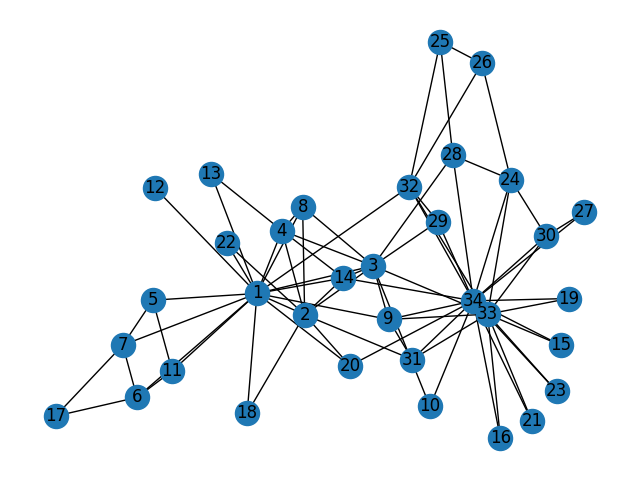

In [66]:
nx.draw(Karate, with_labels=True)

In [67]:
modulesKarate = nx_comm.girvan_newman(Karate)

QKarate = []
PKarate = []

for i in modulesKarate:
    Q = nx_comm.modularity(Karate,i)
#     print(i)
#     print(Q)
    PKarate.append(i)
    QKarate.append(Q)

In [70]:
QKarate

[0.3599605522682445,
 0.34878369493754113,
 0.3632478632478633,
 0.40129848783694944,
 0.3925049309664695,
 0.37623274161735704,
 0.3583168967784353,
 0.341715976331361,
 0.3247863247863249,
 0.3159105851413545,
 0.29865220249835644,
 0.28040762656147267,
 0.2628205128205128,
 0.2475345167652859,
 0.22682445759368827,
 0.20890861275476652,
 0.18984220907297825,
 0.18129520052596965,
 0.16009204470742933,
 0.14694280078895464,
 0.12031558185404344,
 0.10815253122945427,
 0.09064760026298486,
 0.08029257067718604,
 0.06993754109138725,
 0.05785667324128863,
 0.03418803418803419,
 0.022024983563445122,
 -0.002876397107166325,
 -0.026298487836949356,
 -0.03763971071663377,
 -0.05374753451676527,
 -0.04980276134122286]

In [69]:
max(QKarate)

0.40129848783694944

In [ ]:
# PKarate[3]

In [ ]:
# PKarate

In [ ]:
nx_comm.label_propagation_communities(Karate)

In [ ]:
nx_comm.modularity(Karate,nx_comm.label_propagation_communities(Karate))